***2022 SUMMER ELG 5255 APPLIED MACHINE LEARNING***

***ASSIGNMENT 4***

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier as xgb
#Remove warning
import warnings
warnings.filterwarnings('ignore')

In [183]:
# Read the dataset
df_train = pd.read_csv("/content/drive/MyDrive/ML4/pendigits-tra.csv", header=None)
df_test = pd.read_csv("/content/drive/MyDrive/ML4/pendigits-tes.csv",header=None)

In [184]:
# Train dataset
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1


In [185]:
# Test dataset
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
3494,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
3495,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
3496,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


## Split the data set

In [186]:
X_train = df_train.iloc[:,:16]
y_train = df_train.iloc[:,16]
X_test = df_test.iloc[:,:16]
y_test = df_test.iloc[:,16]

# 2- Decision Tree Classifier

In [187]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [188]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy: 92.65294453973699 %


Decision tree Confusion matrix


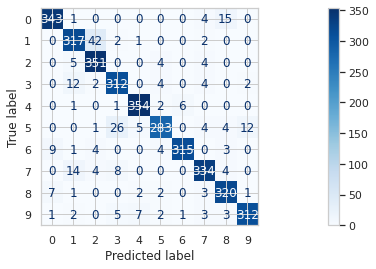

In [189]:
print("Decision tree Confusion matrix")
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.rcParams["figure.figsize"] = (25,4)

plt.show()

# Bagging

## (a)

## SVM base estimator

SVM accuracy 0.9805603201829617
---------------------------
SVM Confusion Matrix


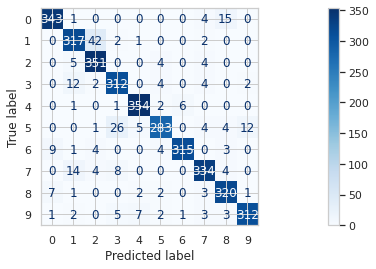

In [190]:
estimator_svm = BaggingClassifier(base_estimator=SVC() , n_estimators=10, random_state=2022)
estimator_svm.fit(X_train, y_train)
y_pred = estimator_svm.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("SVM accuracy",acc)
print('---------------------------')
print("SVM Confusion Matrix")
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Decision Tree base estimator

Decision Tree accuracy 0.940251572327044
---------------------------
Decision Tree Confusion Matrix


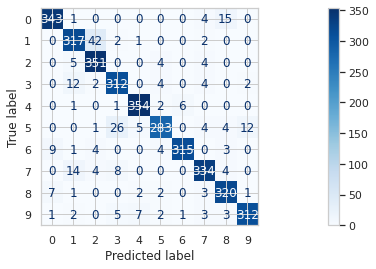

In [191]:
estimator_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier() , n_estimators=10, random_state=2022)
estimator_dt.fit(X_train, y_train)
y_pred = estimator_dt.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree accuracy",acc)
print('---------------------------')
print("Decision Tree Confusion Matrix")
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

<h3>SVM estimator is better in accuracy than Decision Tree estimator.

SVM accuracy = 0.9805603201829617

Decision Tree = 0.940251572327044

## Voting 

In [192]:
models = [('DecisionTree',estimator_dt),('svm',estimator_svm)]
ensemble = VotingClassifier(estimators=models, voting='soft')

In [193]:
from numpy.random.mtrand import seed
seed(10)
# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('DecisionTree',DecisionTreeClassifier()),('svm',SVC())], voting='hard')
# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('DecisionTree',DecisionTreeClassifier()),('svm',SVC(probability=True))], voting='soft')

# make predictions with the hard voting model
voting_classifier_hard.fit(X_train, y_train)
y_pred_vch = voting_classifier_hard.predict(X_test)

# make predictions with the soft voting model
voting_classifier_soft.fit(X_train, y_train)
y_pred_vcs = voting_classifier_soft.predict(X_test)

# evaluate both models with the accuracy
acc_vch = metrics.accuracy_score(y_test, y_pred_vch)
acc_vcs = metrics.accuracy_score(y_test, y_pred_vcs)

# evaluate both models with the f-1 score
f1_vch = f1_score(y_test, y_pred_vch, average='macro')
f1_vcs = f1_score(y_test, y_pred_vcs, average='macro')


# print the accuracy scores
print('Acuuracy of the hard voting classifier: {}'.format(np.round(acc_vch,4)))
print('Accuracy of the soft voting classifier: {}'.format(np.round(acc_vcs,4)))
print("---------------------------------------------------")


Acuuracy of the hard voting classifier: 0.9428
Accuracy of the soft voting classifier: 0.9188
---------------------------------------------------


## (b) Accuracy vs. Number of Estimators

In [194]:
acc_arr= []
nEst_arr = []

for nEst in [40, 80, 120, 160, 200]:
  nEst_arr.append(nEst)
  estimator = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nEst, random_state=2022)
  estimator.fit(X_train, y_train)
  y_pred = estimator.predict(X_test)
  acc_arr.append(metrics.accuracy_score(y_test, y_pred)*100)
  

In [195]:
a = max(acc_arr)
acc_arr.index(a)

2

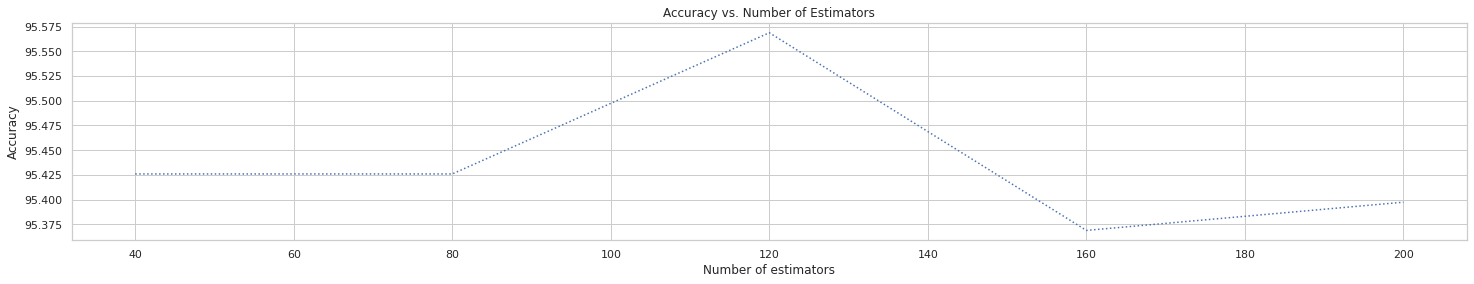

In [196]:
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Estimators")
plt.plot(nEst_arr,acc_arr,linestyle = 'dotted')
plt.show()


<h2>We can see that the best number of estimators is <b>120</b>

# Boosting


## (a)  GradientBoosting classifier

### different n_estimators

N_estimators:  10
Accuracy:  0.6700971983990852


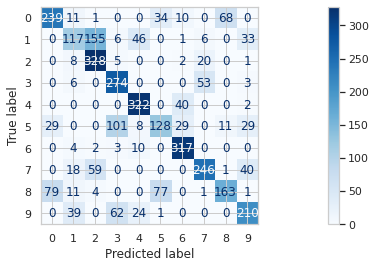

N_estimators:  50
Accuracy:  0.8367638650657518


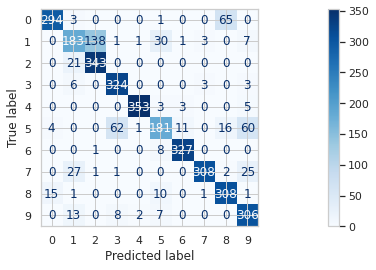

N_estimators:  150
Accuracy:  0.9122355631789594


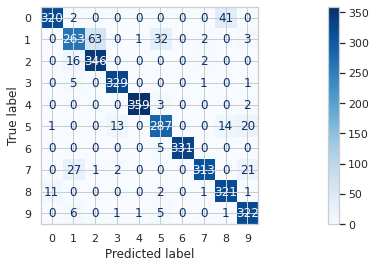

N_estimators:  200
Accuracy:  0.9216695254431103


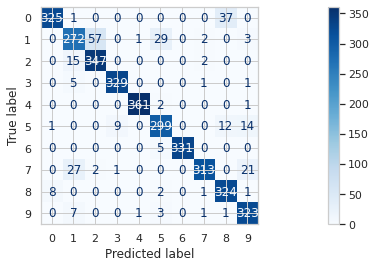

In [197]:
from sklearn.ensemble import GradientBoostingClassifier
est = [10, 50, 150, 200]
for i in est:
    clf = GradientBoostingClassifier(n_estimators=i, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("N_estimators: ", i)   
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()


<h4>The best number of estimators is <b>200</b>.

### different learning rate

Learning Rate:  0.1
Accuracy:  0.9216695254431103


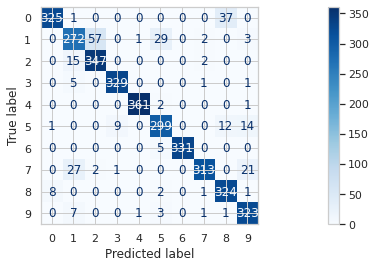

Learning Rate:  0.3
Accuracy:  0.9485420240137221


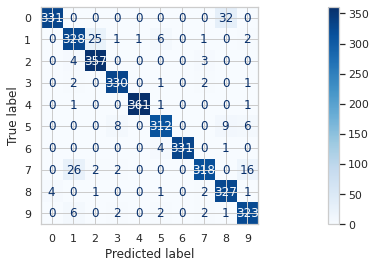

Learning Rate:  0.6
Accuracy:  0.9528301886792453


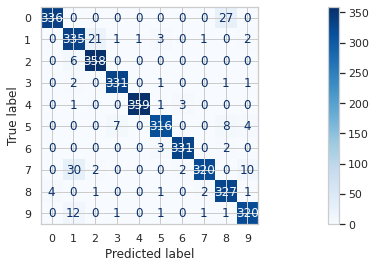

Learning Rate:  0.9
Accuracy:  0.8204688393367638


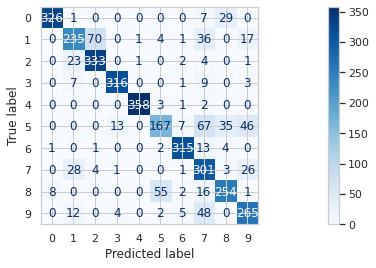

In [198]:
lr = [0.1, 0.3, 0.6,0.9]
for i in lr:
      clf = GradientBoostingClassifier(n_estimators=200, learning_rate=i, max_depth=1, random_state=0).fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      print("Learning Rate: ", i)   
      print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
      plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
      plt.show()


The model with the best performance from the previous cell has number of estimators = 200 and learning rate = 0.6.

### Gradient Boosting Classifier with chosen n_estimators and learning rate


Accuracy:  0.9528301886792453


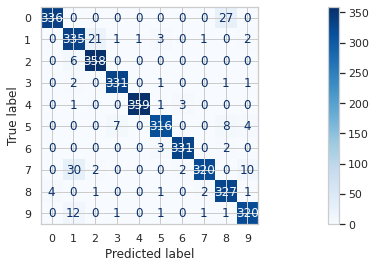

In [199]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.6, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_GB = clf.predict(X_test)
gbc_acc = metrics.accuracy_score(y_test, y_pred_GB)
print("Accuracy: ", gbc_acc)
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()


##(b)

### XG Boosting Classifier with choosn n_estimators and learning rate


Accuracy:  0.9676958261863923
---------------------------------


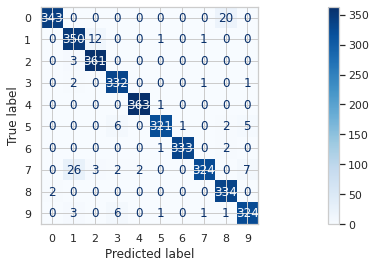

In [200]:
xgb_model = xgb(n_estimators=200, learning_rate=0.6).fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test).reshape((-1,1))
y_pred_xgb = y_pred_xgb.reshape((-1)).astype(int)
xgb_acc= metrics.accuracy_score(y_test, y_pred_xgb)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_xgb))
print("---------------------------------")
plot_confusion_matrix(xgb_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()


## (C) Compare

In [201]:
print('Accuracy of GradientBoostClassifiers =',gbc_acc )
print('Accuracy of XGBoost =', xgb_acc)

Accuracy of GradientBoostClassifiers = 0.9528301886792453
Accuracy of XGBoost = 0.9676958261863923


As can be seen, XGBoost performs better than GradientBoostClassifiers in terms of accuracy.

<b>XGBoost's</b> accuracy is <b>0.9676958261863923</b> 

compared to <b>GradientBoost </b> Classifier is <b>0.9528301886792453</b>.

<h3><b>Which metric is the best to compare performance, accuracy or confusion matrix?</b>

<h3><b>Accuracy performance</b> metrics can be decisive when dealing with imbalanced data, or overfitting.<br>
<b>The confusion matrix</b>, precision, recall, and F1 score gives better intuition of prediction results as compared to accuracy.<br>

###Check if the data is imbalanced

In [202]:
df1 = pd.DataFrame()
df1['numbers'] = df_train.iloc[:, -1].value_counts().index.tolist()
df1['count'] = df_train.iloc[:, -1].value_counts()

In [203]:
df2 = pd.DataFrame()
df2['numbers'] = df_test.iloc[:, -1].value_counts().index.tolist()
df2['count'] = df_test.iloc[:, -1].value_counts()

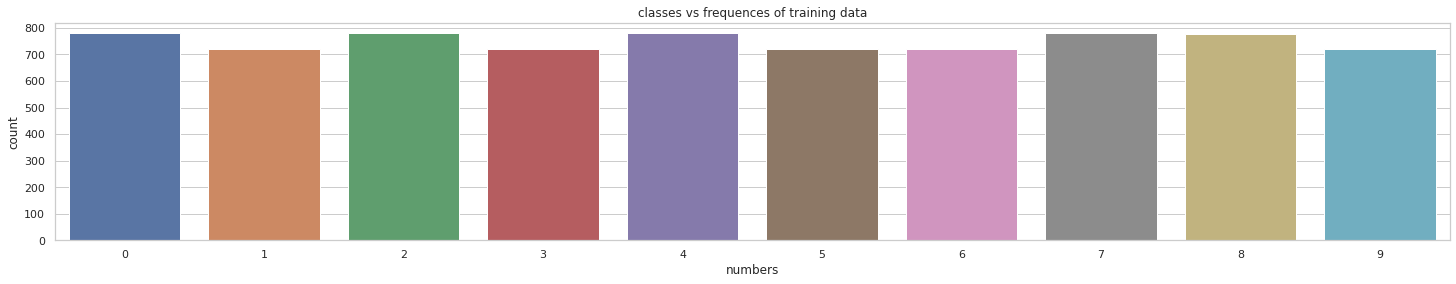

In [204]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="numbers", y="count", data=df1).set(title="classes vs frequences of training data")

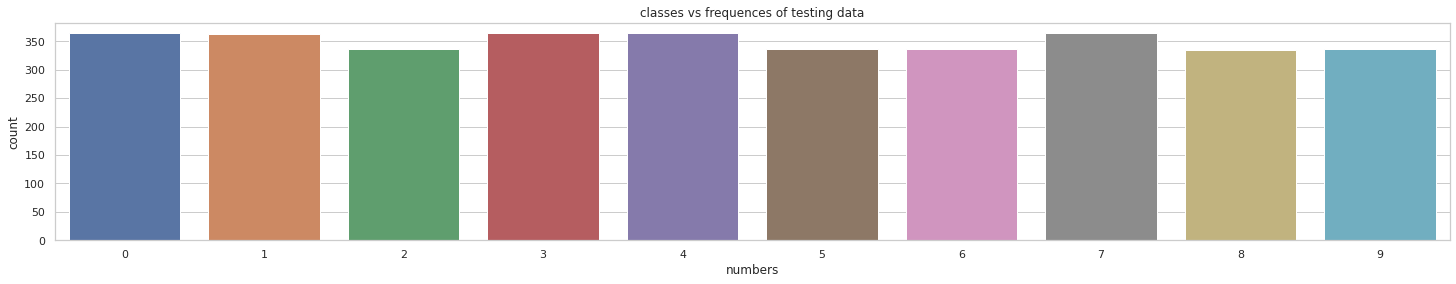

In [205]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="numbers", y="count",data=df2).set(title="classes vs frequences of testing data")

<h2>The data doesn't have any balancing issues

### Check for overfitting

In [206]:
print('F1-score of GradientBoostClassifiers = ',f1_score(y_test, y_pred_GB, average='macro'))
print('F1-score of XGBoost = ',f1_score(y_test, y_pred_xgb,  average='macro'))

F1-score of GradientBoostClassifiers =  0.9532682289531497
F1-score of XGBoost =  0.967845536409883


<h2>The F1-score can tell us if the data is dealing with overfitting or not.<br>
We can see from F1 score, that there is no overfitting in the data, so we decide that Accuracy is a superior metric to Confusion matrix.